In [5]:
%pylab inline

import numpy as np
import pandas as pd
import os

RLENS = [36 , 51, 100, 150] #, 150]

DATADIR="/storage/mgymrek/chipmunk/fig2_repeats"
OUTDIR=os.path.join(DATADIR, "pdfs")


lcols = []
for rl in RLENS:
    lcols.extend(["rl_%s_s"%rl, "rl_%s_p"%rl, "rl_%s_s_SCORE"%rl, "rl_%s_p_SCORE"%rl])

data = pd.read_csv(os.path.join(DATADIR, "repeat_cov_byrl.bed"), sep="\t",
                   names=["chrom","start","end","score","len"]+lcols)

Populating the interactive namespace from numpy and matplotlib


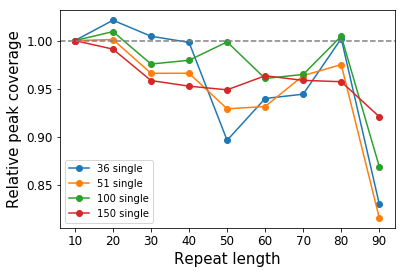

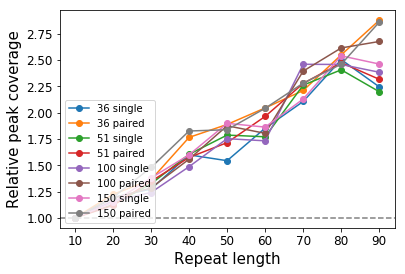

In [7]:
aggdir = {}
for rl in RLENS:
    aggdir["rl_%s_s"%rl] = np.mean
    aggdir["rl_%s_p"%rl] = np.mean
    aggdir["rl_%s_s_SCORE"%rl] = np.mean
    aggdir["rl_%s_p_SCORE"%rl] = np.mean
        
BINSIZE=10
data["lbin"] = (data["len"]/BINSIZE).apply(int)
covdata = data[data["len"]<100].groupby("lbin", as_index=False).agg(aggdir)

for col in covdata.columns:
    if col != "lbin":
        covdata[col] = covdata[col]/covdata[col].values[0]
        
fig = plt.figure()
ax = fig.add_subplot(111)
for rl in RLENS:
    ax.plot(covdata["lbin"], covdata["rl_%s_s"%rl], label="%s single"%rl, marker="o")
    #ax.plot(covdata["lbin"], covdata["rl_%s_p"%rl], label="%s paired"%rl, marker="o")
ax.axhline(y=1, linestyle="dashed", color="gray")
ax.legend(loc="lower left")
lbins = sorted(list(set(covdata["lbin"])))
ax.set_xticks(lbins);
ax.set_xticklabels([item*BINSIZE for item in lbins], size=12)
ax.set_yticklabels(["%.2f"%item for item in ax.get_yticks()], size=12);
ax.set_xlabel("Repeat length", size=15);
ax.set_ylabel("Relative peak coverage", size=15);

fig = plt.figure()
ax = fig.add_subplot(111)
for rl in RLENS:
    ax.plot(covdata["lbin"], covdata["rl_%s_s_SCORE"%rl], label="%s single"%rl, marker="o")
    ax.plot(covdata["lbin"], covdata["rl_%s_p_SCORE"%rl], label="%s paired"%rl, marker="o")
ax.axhline(y=1, linestyle="dashed", color="gray")
ax.legend(loc="lower left")
lbins = sorted(list(set(covdata["lbin"])))
ax.set_xticks(lbins);
ax.set_xticklabels([item*BINSIZE for item in lbins], size=12)
ax.set_yticklabels(["%.2f"%item for item in ax.get_yticks()], size=12);
ax.set_xlabel("Repeat length", size=15);
ax.set_ylabel("Relative peak coverage", size=15);

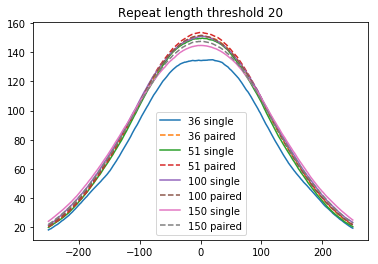

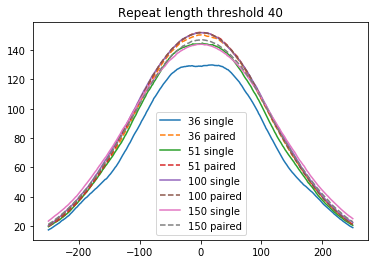

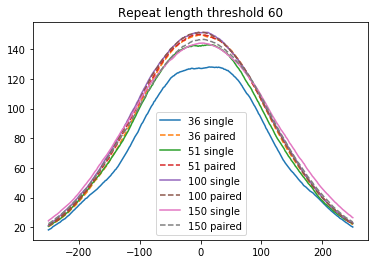

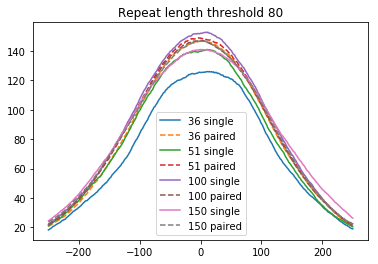

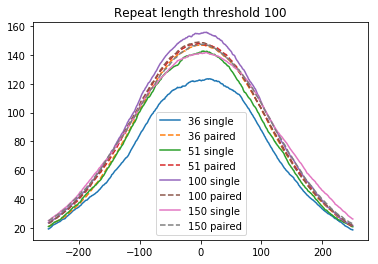

In [8]:
lcols = []
for rl in RLENS:
    lcols.extend(["rl_%s_s_cov"%rl,"rl_%s_s_neg"%rl, "rl_%s_s_pos"%rl])
    lcols.extend(["rl_%s_p_cov"%rl,"rl_%s_p_neg"%rl, "rl_%s_p_pos"%rl])
    lcols.extend(["rl_%s_s_cov_SCORE"%rl,"rl_%s_s_neg_SCORE"%rl, "rl_%s_s_pos_SCORE"%rl])
    lcols.extend(["rl_%s_p_cov_SCORE"%rl,"rl_%s_p_neg_SCORE"%rl, "rl_%s_p_pos_SCORE"%rl])

for thresh in [20, 40, 60, 80, 100]:
    cdata = pd.read_csv("/storage/mgymrek/chipmunk/fig2_repeats/repeat_composite.gt%s.txt"%thresh, sep="\t")
    #cdata = pd.read_csv("/storage/mgymrek/chipmunk/fig2_repeats/repeat_composite.txt", sep="\t")
    cdata.columns = ["dist"]+lcols

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for rl in RLENS:
        ax.plot(cdata["dist"], cdata["rl_%s_s_cov"%rl], label="%s single"%rl)
        ax.plot(cdata["dist"], cdata["rl_%s_p_cov"%rl], label="%s paired"%rl, linestyle="dashed")
    ax.legend()
    ax.set_title("Repeat length threshold %s"%thresh)